<center><h1>Exploratory Data Analysis</h1></center>

In [17]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading the cleaned data

In [18]:
df = pd.read_csv('/Users/dr.shivambhatnagar/Desktop/github_python/Diabetes_Dataset_Cleaned.csv')

In [19]:
df.head()

,ParticipantID,TreatmentGroup,RandomizationDate,StudySite,Age,Gender,BMI,DiabetesDuration,SmokingStatus,EducationLevel,...,WeightChange,FollowupWeight,QoLChange,FollowupQoL,TargetAchieved,PatientSatisfaction,AdverseEvents,DaysToComplication,ComplicationOccurred,MedicationAdherence
0,DM1001,0,2024-04-26,0,40,1,23.5,18,2,0,...,0.2,113.0,6.3,50.0,0,1,0,149,1,96.7
1,DM1002,0,2024-07-12,3,32,1,36.6,1,0,1,...,-7.5,101.0,1.5,58.0,1,3,1,94,1,79.8
2,DM1003,0,2024-04-16,3,62,1,31.9,2,0,2,...,-1.3,99.3,7.6,89.0,0,0,0,215,1,87.7
3,DM1004,0,2024-01-29,1,36,1,35.8,1,1,1,...,-1.1,96.4,-2.6,83.0,0,2,1,167,1,78.9
4,DM1005,0,2024-04-30,3,48,0,30.7,1,0,1,...,1.1,80.1,10.0,88.0,0,2,0,365,0,95.5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         300 non-null    object 
 1   TreatmentGroup        300 non-null    int64  
 2   RandomizationDate     300 non-null    object 
 3   StudySite             300 non-null    int64  
 4   Age                   300 non-null    int64  
 5   Gender                300 non-null    int64  
 6   BMI                   300 non-null    float64
 7   DiabetesDuration      300 non-null    int64  
 8   SmokingStatus         300 non-null    int64  
 9   EducationLevel        300 non-null    int64  
 10  Complications         300 non-null    int64  
 11  BaselineHbA1c         300 non-null    float64
 12  BaselineFBS           300 non-null    float64
 13  BaselineWeight        300 non-null    float64
 14  BaselineQoL           300 non-null    int64  
 15  FollowupCompleted     3

<h3>Identifying the categorical columns and changing their datatype

In [21]:
for col in df.columns[df.nunique()<5]:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ParticipantID         300 non-null    object  
 1   TreatmentGroup        300 non-null    category
 2   RandomizationDate     300 non-null    object  
 3   StudySite             300 non-null    category
 4   Age                   300 non-null    int64   
 5   Gender                300 non-null    category
 6   BMI                   300 non-null    float64 
 7   DiabetesDuration      300 non-null    int64   
 8   SmokingStatus         300 non-null    category
 9   EducationLevel        300 non-null    category
 10  Complications         300 non-null    category
 11  BaselineHbA1c         300 non-null    float64 
 12  BaselineFBS           300 non-null    float64 
 13  BaselineWeight        300 non-null    float64 
 14  BaselineQoL           300 non-null    int64   
 15  Follow

<h3>Numerical Variables Analysis

In [22]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()

In [23]:
#Summary statistics
df[num_cols].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,49.16,14.51,25.0,37.00,50.00,61.00,74.0
BMI,300.0,32.52,5.99,22.1,27.15,33.10,37.82,42.0
DiabetesDuration,300.0,9.93,5.50,1.0,5.00,10.00,15.00,19.0
BaselineHbA1c,300.0,9.75,1.31,7.5,8.78,9.70,10.90,12.0
BaselineFBS,300.0,211.67,38.53,140.0,181.50,215.00,243.00,278.0
BaselineWeight,300.0,90.96,16.77,60.1,77.40,91.10,105.20,119.8
BaselineQoL,300.0,59.43,17.41,30.0,44.00,58.50,74.00,89.0
HbA1cChange,300.0,-1.21,0.96,-3.7,-1.90,-1.10,-0.60,1.3
FollowupHbA1c,300.0,8.54,1.73,4.4,7.38,8.55,9.80,13.0
FBSChange,300.0,-32.12,30.01,-111.0,-51.25,-34.50,-13.00,49.0


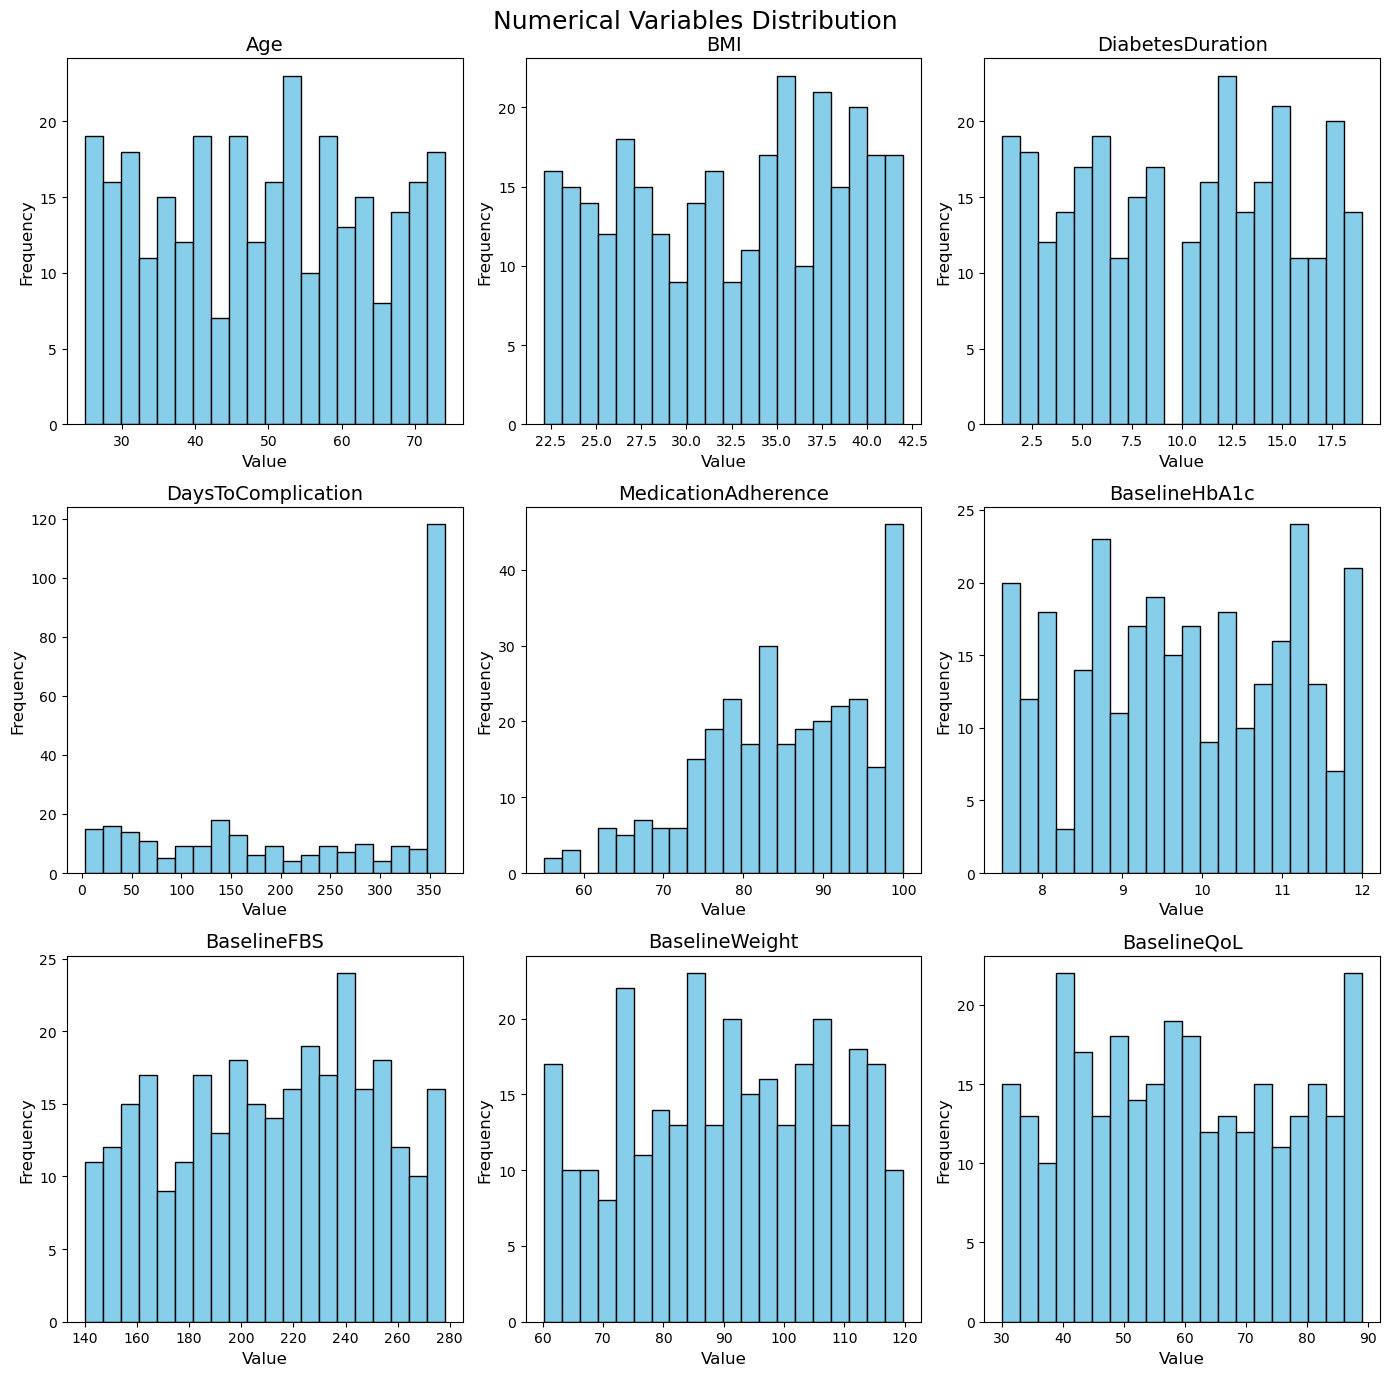

In [24]:
#Histogram to check distribution
num_cols_subset = ['Age','BMI','DiabetesDuration','DaysToComplication','MedicationAdherence',
                   'BaselineHbA1c','BaselineFBS','BaselineWeight','BaselineQoL']
fig,axes = plt.subplots(3,3,figsize=(14,14))
fig.suptitle('Numerical Variables Distribution',fontsize=18)
for i,col in enumerate(num_cols_subset):
    axes[i//3,i%3].hist(df[col],bins=20,color='skyblue',edgecolor='black')
    axes[i//3,i%3].set_title(col,fontsize=14)
    axes[i//3,i%3].set_xlabel('Value',fontsize=12)
    axes[i//3,i%3].set_ylabel('Frequency',fontsize=12)
plt.tight_layout()
plt.show()    

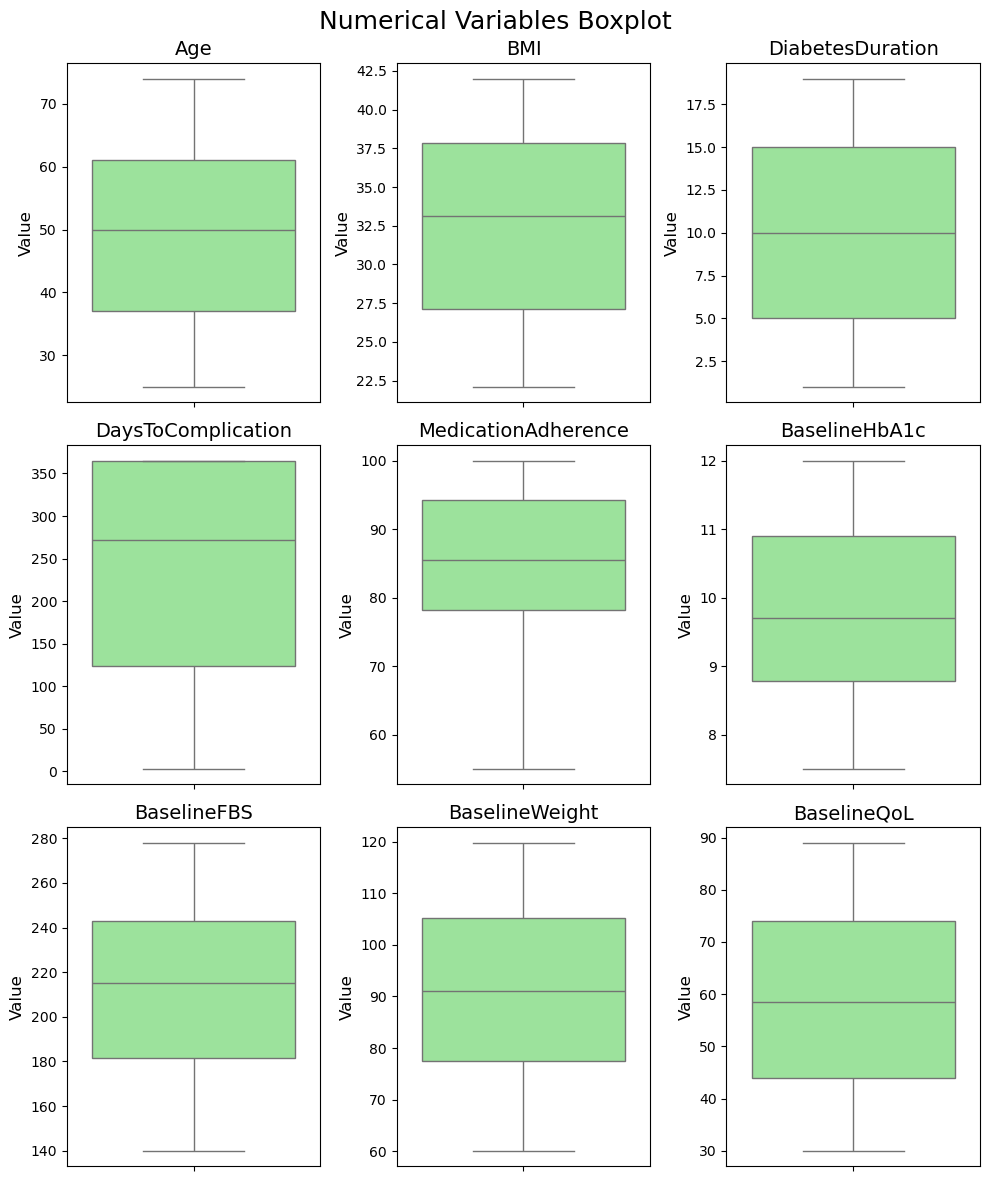

In [25]:
#Boxpot to check outliers
fig,axes = plt.subplots(3,3,figsize=(10,12))    
fig.suptitle('Numerical Variables Boxplot',fontsize=18)
for i,col in enumerate(num_cols_subset):
    sns.boxplot(y=df[col],ax=axes[i//3,i%3],color='lightgreen')
    axes[i//3,i%3].set_title(col,fontsize=14)
    axes[i//3,i%3].set_ylabel('Value',fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
#Checking for skewness
for i, col in enumerate (num_cols_subset):
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()

    if 3*(mean - median)/std_dev > 0:
        skew_direction = "right" if mean > median else "left"
        print(f"{i+1}. {col}: Shows {skew_direction} skewness (Mean: {mean:.1f}, Median: {median:.1f})")
    else:
        print(f"{i+1}. {col}: Approximately normal distribution (Mean: {mean:.1f}, Median: {median:.1f})")

1. Age: Approximately normal distribution (Mean: 49.2, Median: 50.0)
2. BMI: Approximately normal distribution (Mean: 32.5, Median: 33.1)
3. DiabetesDuration: Approximately normal distribution (Mean: 9.9, Median: 10.0)
4. DaysToComplication: Approximately normal distribution (Mean: 235.7, Median: 271.5)
5. MedicationAdherence: Approximately normal distribution (Mean: 85.4, Median: 85.5)
6. BaselineHbA1c: Shows right skewness (Mean: 9.7, Median: 9.7)
7. BaselineFBS: Approximately normal distribution (Mean: 211.7, Median: 215.0)
8. BaselineWeight: Approximately normal distribution (Mean: 91.0, Median: 91.1)
9. BaselineQoL: Shows right skewness (Mean: 59.4, Median: 58.5)


<h3>Categorical Variable Analysis

In [27]:
cat_cols = df.select_dtypes(include=['category']).columns.to_list()
cat_cols

['TreatmentGroup',
 'StudySite',
 'Gender',
 'SmokingStatus',
 'EducationLevel',
 'Complications',
 'FollowupCompleted',
 'TargetAchieved',
 'PatientSatisfaction',
 'AdverseEvents',
 'ComplicationOccurred']

In [28]:
#mapping categorical variables to their respective values
df['TreatmentGroup'] = df['TreatmentGroup'].map({0:'StandardCare',1:'NewMedication'})
df['StudySite'] = df['StudySite'].map({0:'Atlanta',1:'Boston',2:'Chicago',3:'Denver'})
df['Gender'] = df['Gender'].map({0:'Male',1:'Female'})
df['SmokingStatus'] = df['SmokingStatus'].map({0:'Never',1:'Former',2:'Current'})
df['EducationLevel'] = df['EducationLevel'].map({0:'Primary',1:'Secondary',2:'College+'})
df['Complications'] = df['Complications'].map({0:'None',1:'Neuropathy',2:'Retinopathy',3:'Both'})
df['FollowupCompleted'] = df['FollowupCompleted'].map({0:'No',1:'Yes'}) 
df['TargetAchieved'] = df['TargetAchieved'].map({0:'No',1:'Yes'})   
df['PatientSatisfaction'] = df['PatientSatisfaction'].map({0:'Poor',1:'Fair',2:'Good',3:'Excellent'})
df['AdverseEvents'] = df['AdverseEvents'].map({0:'None',1:'Mild',2:'Moderate',3:'Severe'})
df['ComplicationOccurred'] = df['ComplicationOccurred'].map({0:'Censored',1:'Event'})

In [ ]:
#Constructing frequency tables
for col in cat_cols:
    print(f"{col} Frequency Table:")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(1)})
    print(result)
    print("\n") 

TreatmentGroup Frequency Table:
                Count  Percentage
TreatmentGroup                   
StandardCare      150        50.0
NewMedication     150        50.0


StudySite Frequency Table:
           Count  Percentage
StudySite                   
Atlanta      101        33.7
Boston        78        26.0
Chicago       68        22.7
Denver        53        17.7


Gender Frequency Table:
        Count  Percentage
Gender                   
Male      161        53.7
Female    139        46.3


SmokingStatus Frequency Table:
               Count  Percentage
SmokingStatus                   
Never            146        48.7
Former            99        33.0
Current           55        18.3


EducationLevel Frequency Table:
                Count  Percentage
EducationLevel                   
Secondary         146        48.7
College+           81        27.0
Primary            73        24.3


Complications Frequency Table:
               Count  Percentage
Complications                  

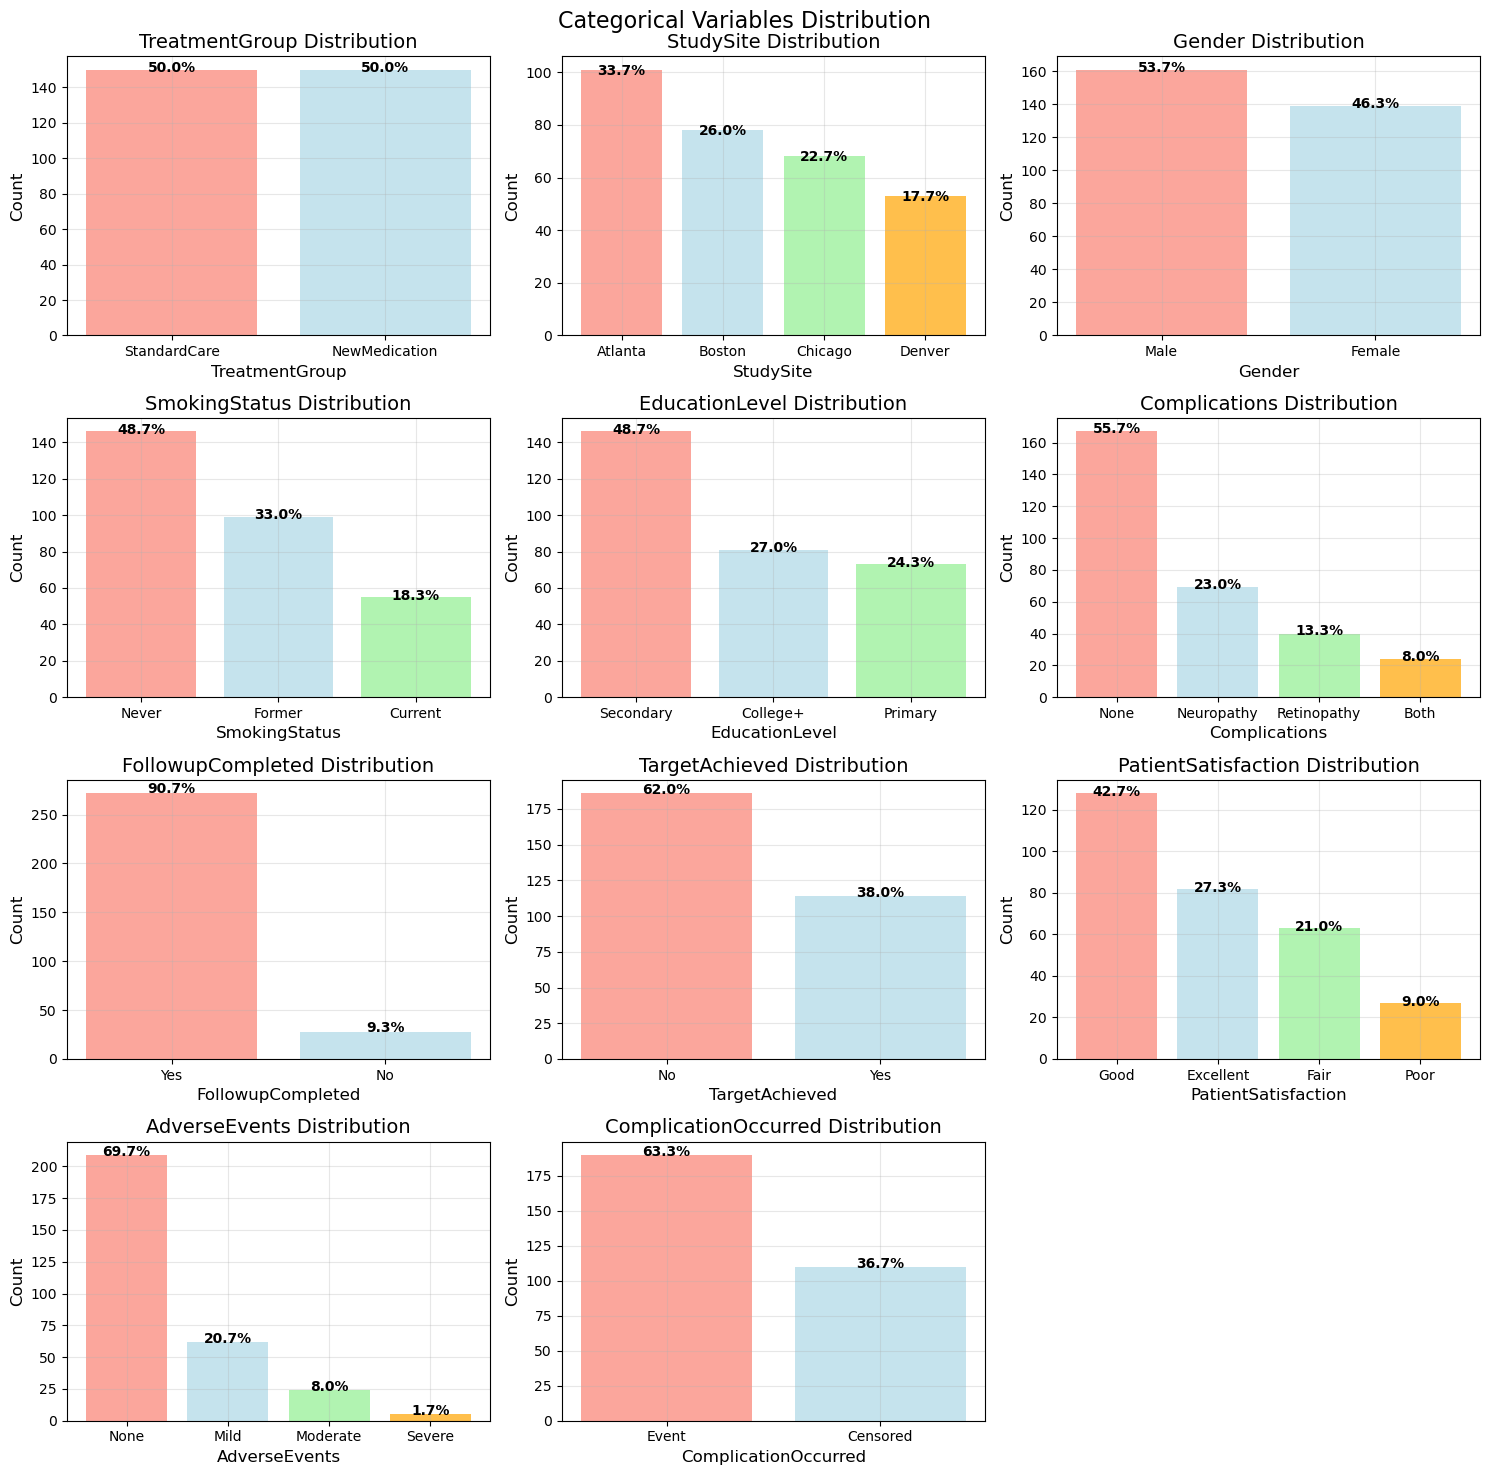

In [48]:
#Visualizing categorical variables
fig,axes = plt.subplots(4,3,figsize=(15,15))
fig.suptitle('Categorical Variables Distribution',fontsize=16)
for i,col in enumerate(cat_cols):
    counts = df[col].value_counts()
    axes[i//3,i%3].bar(counts.index, counts.values, color = ['salmon','lightblue','lightgreen','orange'][:len(counts)], alpha=0.7)
    axes[i//3,i%3].set_title(f'{col} Distribution',fontsize=14)
    axes[i//3,i%3].set_xlabel(col,fontsize=12)
    axes[i//3,i%3].set_ylabel('Count',fontsize=12)
    for j, (category,count) in enumerate(counts.items()):
        percentage = count/len(df) * 100
        axes[i//3,i%3].text(j, count - len(df)*0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
    axes[i//3,i%3].grid(True, alpha=0.3)
fig.delaxes(axes[3,2]) 
plt.tight_layout()
plt.show()